In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
L = 1
nt = 100
nx = 51
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

In [42]:
from scipy.linalg import solve
from scipy.sparse import *
from scipy import *

In [4]:
def generateMatrix(N, sigma):
    """ Computes the A matrix for diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
        
        Parameters:
            T - temperature at current time step
            sigma - alpha*dt/dx**2
        
        Returns:
            A - Matrix for diffusion equation
        """
    
    #set up diagonal
    d = numpy.diag(numpy.ones(N-2)* (2+1./sigma))
    
    #Neumann BC
    d[-1, -1] = 1+1./sigma
    
    #upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    #Lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [34]:
def generateRHS(T, sigma):
    """Computes RHS of linear system for diffusion equation with backward
        Euler
        
        Parameters:
            T - Temp at current time step
            sigma - alpha*dt/dx**2
            
        Returns
            b - RHS of diffusion eqn.
        """
    
    b = numpy.zeros_like(T)
    
    b = T[1:-1]*1./sigma
    #consider Dirichlet BC
    b[0] += T[0]
    
    return b

In [35]:
def implicitFTCS(T, A, nt, sigma):
    """Advances diffusion eqn. in time with implicit central scheme
    
    Parameters:
        T - initial temperature profile
        A - Matrix with discretized diffusion eqn. 
        nt - number of time steps
        sigma - alpha*dt/dx**2
        
    Returns:
        T - temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma)
        T_interior = solve(A, b)
        T[1:-1] = T_interior
        #Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2]
        
    return T

In [36]:
sigma = 0.5
dt = sigma*dx**2/alpha
nt = 1000

A = generateMatrix(nx, sigma)
print(A)
print(numpy.shape(A))

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]
(49, 49)


In [37]:
T = implicitFTCS(Ti.copy(), A, nt, sigma)

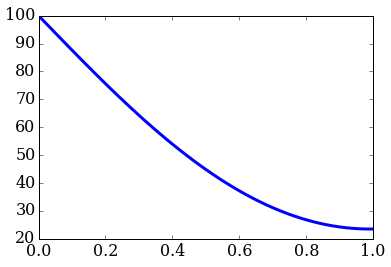

In [38]:
pyplot.plot(numpy.linspace(0, 1, nx), T, lw=3);

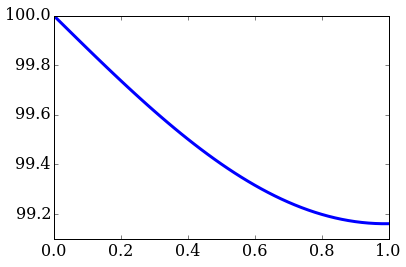

In [39]:
sigma = 5

A = generateMatrix(nx, sigma)
T = implicitFTCS(Ti.copy(), A, nt, sigma)

pyplot.plot(numpy.linspace(0,1 , nx), T, lw = 3);

In [78]:
#create a sparse A matrix
def generateSparseMatrix(N, sigma):
    """ Computes the A matrix for diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
        
        Parameters:
            T - temperature at current time step
            sigma - alpha*dt/dx**2
        
        Returns:
            A - Matrix for diffusion equation
        """
    #A = scipy.dia_matrix( (N-2, N-2))
    data = array([[numpy.ones(N-2)*2+1./sigma], [numpy.ones(N-3)*-1], [numpy.ones(N-3)*-1] ])
    offsets = array([0, -1, 1])
    #Neumann BC
    #data[-1, -1] = 1+1./sigma
    print(type(offsets))
    
    A = dia_matrix( (data, offsets), shape=(N-2, N-2))

    return A

In [79]:
sigma = 0.5
dt = sigma*dx**2/alpha
nt = 1000

A = generateSparseMatrix(7, sigma)
print(scipy.shape(A))
print(A)
A.todense()
#T = implicitFTCS(Ti.copy(), A, nt, sigma)
#A.todense()
#pyplot.plot(numpy.linspace(0,1 , nx), T, lw = 3);


<class 'numpy.ndarray'>
(5, 5)
  (0, 0)	[ 4.  4.  4.  4.  4.]
  (1, 0)	[-1. -1. -1. -1.]


RuntimeError: internal error: failed to resolve data types